<a href="https://colab.research.google.com/github/alejopijuan/PromptInspirator/blob/main/car_or_moto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
! pip install -Uqq fastbook

In [13]:
from fastbook import *
import fastbook

In [14]:
fastbook.setup_book()

In [70]:
urls = search_images_ddg('car photos', max_images=3)
len(urls), urls[2]

(3, 'https://cdn.motor1.com/images/mgl/lWE01/s1/smart-fortwo-cabrio.jpg')

In [71]:
dest = Path("car3.jpg")
if not dest.exists(): download_url(urls[2], dest, show_progress=False)

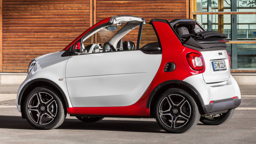

In [72]:
im = Image.open(dest)
im.to_thumb(256,256)

In [136]:
urls = search_images_ddg('motorcycle photos', max_images=3)
len(urls), urls[2]

(3,
 'https://cdn.lifestyleasia.com/wp-content/uploads/2019/04/26142947/The-New-BMW-R-1250-RT-5.jpg')

In [137]:
dest = Path("moto3.jpg")
if not dest.exists(): download_url(urls[2], dest, show_progress=False)

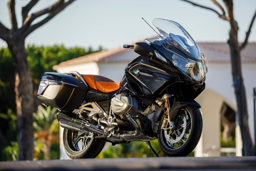

In [138]:
im = Image.open(dest)
im.to_thumb(256,256)

In [120]:
rm -r car_or_moto

In [ ]:
searches = 'car', 'motorcycle'
path = Path('car_or_moto')

if not path.exists():
  for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} photo')
    download_images(dest, urls=results[:200])
    resize_images(dest, max_size=400, dest=dest)

In [121]:
Path('car_or_moto').mkdir()
Path('car_or_moto/car').mkdir()
Path('car_or_moto/moto').mkdir()

In [122]:
dest= Path('car_or_moto')

In [123]:
results = search_images_ddg('car photo')

In [124]:
download_images(dest/'car', urls=results[:400])

In [125]:
resize_images(dest/'car', max_size=400, dest=dest/'car')

In [126]:
results = search_images_ddg('motorcycle photo')

In [127]:
download_images(dest/'moto', urls=results[:400])

In [128]:
resize_images(dest/'moto', max_size=400, dest=dest/'moto')

In [129]:
failed = verify_images(get_image_files(dest/'car'))
failed.map(Path.unlink)

(#20) [None,None,None,None,None,None,None,None,None,None...]

In [130]:
failed = verify_images(get_image_files(dest/'moto'))
failed.map(Path.unlink)

(#8) [None,None,None,None,None,None,None,None]

In [131]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=0),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(dest)

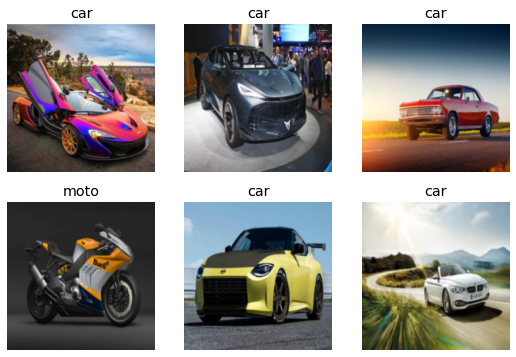

In [132]:
dls.show_batch(max_n=6)

In [133]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.129336,0.056376,0.027397,00:41


epoch,train_loss,valid_loss,error_rate,time
0,0.206691,0.038878,0.013699,01:00
1,0.129613,0.029975,0.013699,00:59
2,0.087883,0.027308,0.013699,01:03
3,0.064508,0.029338,0.013699,01:06
4,0.050666,0.025551,0.013699,01:00


In [135]:
is_car,_,probs = learn.predict(PILImage.create('car3.jpg'))
print(f"This is a: {is_car}.")
print(f"probability it's a car: {probs[0]:.4f}")

This is a: car.
probability it's a car: 1.0000


In [141]:
is_car,_,probs = learn.predict(PILImage.create('moto3.jpg'))
print(f"This is a: {is_car}.")
print(f"probability it's a car: {probs[0]:.4f}")

This is a: moto.
probability it's a car: 0.0000
